# Understanding Monte Carlo methods

# Example 1: Coin Flip Example

## Monte Carlo Approximation of an Integral using Bernoulli Draws

This exercise demonstrates how to approximate an integral using Monte Carlo simulation.

Specifically, we will estimate the value of the integral used to calculate the expected value of a Bernoulli random variable.

## Background: Bernoulli Distribution

A Bernoulli distribution describes a random experiment with two possible outcomes: success (e.g., heads) or failure (e.g., tails). It's parameterized by a single value, *p*, which represents the probability of success.

* **Random Variable:** Let *X* be a Bernoulli random variable, denoted as *X* ~ Bernoulli(p).
* **Probability Mass Function (PMF):**
    * P(X = 1) = *p* (probability of success)
    * P(X = 0) = 1 - *p* (probability of failure)
* **Expected Value (Mean):** E[X] = *p*
* **Variance:** Var(X) = *p*(1 - *p*)

## Problem Statement

Given a Bernoulli random variable *X* with probability *p* of success (i.e., P(X = 1) = *p*), the expected value of *X* is equal to *p*.

The goal is to estimate the expected value of the Bernoulli random variable using Monte Carlo simulation.

## Monte Carlo Simulation Approach

We can approximate the expected value of a random variable using Monte Carlo simulation. The general procedure involves:

1.  **Generate Random Samples:**
    * Draw *N* independent random samples from the Bernoulli(p) distribution. This is equivalent to simulating *N* coin flips, where each flip has a probability *p* of landing heads.
    * Let these samples be denoted as $X_1, X_2, \cdots, X_N$.

2.  **Approximate the expected value**
    * **Expected Value of X:** $E[X] = \int x * f(x) dx$
    * **Monte Carlo Estimation:** $E[X] ≈ (1/N) * \sum_{i=1}^{N} X_{i}$
    * The sample mean of the generated samples serves as an approximation of the expected value of the Bernoulli random variable.
    

# Implementation

In [1]:
# import require libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


In [2]:
# Define the coin-flip function, using scipy.stats.bernoulli.rvs
def coin_flip(p):
    return stats.bernoulli.rvs(p)

In [3]:
# Draw 10 samples from a fair coin-flip function
for i in range(10):
    print(coin_flip(0.5))

0
1
1
1
1
0
1
0
0
1


In [4]:
# Define the MC function that computes the expected value of given samples
def mc_expected_value(samples):
    return 1/len(samples) * sum(samples)

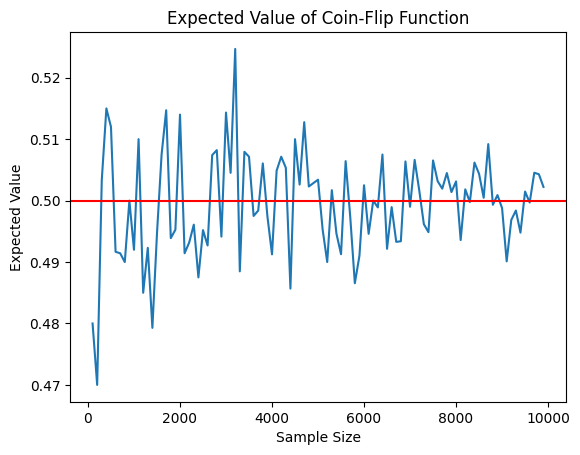

In [5]:
# For a range of sample sizes, compute the expected value of the coin-flip function
coin_flip_p = 0.5
sample_sizes = np.arange(100, 10000, 100)

# Compute the expected value for each sample size
expected_values = []
for size in sample_sizes:
    samples = [coin_flip(coin_flip_p) for i in range(size)]
    expected_values.append(mc_expected_value(samples))

# Plot the expected value as a function of sample size
plt.plot(sample_sizes, expected_values)
# The expected value of a coin flip is p
plt.axhline(y=coin_flip_p, color='r', linestyle='-')
plt.xlabel('Sample Size')
plt.ylabel('Expected Value')
plt.title('Expected Value of Coin-Flip Function')
plt.show()

### What in the graph above is the "epistemic uncertainty"? And what is the aleatoric uncertainty?

The epistemic uncertainty is the uncertainty in the expected value of the coin-flip function as a function of sample size.

The aleatoric uncertainty is the uncertainty in the outcome of the coin flip itself, which is a random process governed by the probability p.

The epistemic uncertainty decreases as the sample size increases, while the aleatoric uncertainty remains constant.

In [6]:
## Define the MC function that computes the variance of given samples
def mc_variance(samples):
    return 1/len(samples) * sum([(sample - mc_expected_value(samples))**2 for sample in samples])

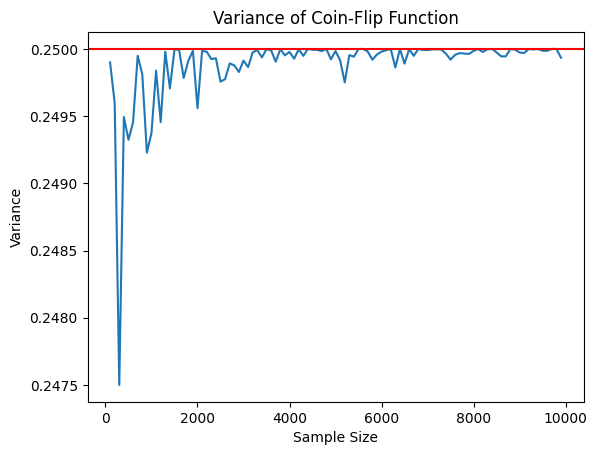

In [7]:
## For a range of sample sizes, compute the variance of the coin-flip function
variances = []
for size in sample_sizes:
    samples = [coin_flip(coin_flip_p) for i in range(size)]
    variances.append(mc_variance(samples))

## Plot the variance as a function of sample size
plt.plot(sample_sizes, variances)
# The variance of a coin flip is p(1-p)
plt.axhline(y=coin_flip_p*(1-coin_flip_p), color='r', linestyle='-')
plt.xlabel('Sample Size')
plt.ylabel('Variance')
plt.title('Variance of Coin-Flip Function')
plt.show()

## Extend the above to compute the expected value and variance of other distributions

# Example 2: Estimating Pi from Circle and Square

## How to use MC sampling to compute/estimate the value of PI

### $\pi$ based on the ratio of areas

<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week2/EstimatePiFromCircleSquare.png" width="256"> 

To estimate the value of Pi, we can use the area of circle and square. 

$$ \frac{Area Circle}{Area Square} = \frac{\pi*r^2}{2r * 2r}  = \frac{\pi}{4}  $$

$\pi$ value can be estimate using the following formula

$$ \pi = 4* \frac{Area \ Circle}{Area \ Square} $$

### For ease of computation, 

Assumd $r = 0.5$, and length_of_field = $2r = 1.0$

## Monte Carlo based approach to estimate the value of pi

We will use MC sampling to compute the area of a unit circle, as well as the unit square that encloses it

In [8]:
# Simulate a MC draw, as a "raindrop"
# return x and y coordinates of raindrop, centered at 0
def raindrop(length_of_field=1):
    x = np.random.uniform(-length_of_field/2, length_of_field/2)
    y = np.random.uniform(-length_of_field/2, length_of_field/2)
    return x, y

In [9]:
# Define function to check whether raindrop is inside circle
def is_inside_circle(x, y, length_of_field=1):
    return x**2 + y**2 < (length_of_field/2)**2


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


3.096


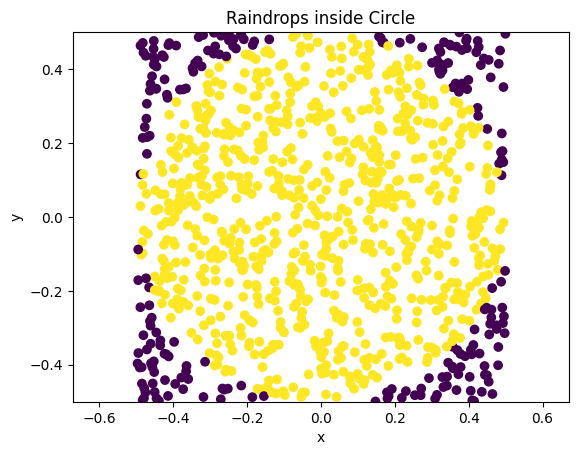

In [10]:
# Draw a bunch of raindrops
num_drops = 1000
raindrops = [raindrop() for i in range(num_drops)]

# Check whether each raindrop is inside the circle
inside_circle = [is_inside_circle(x, y) for x, y in raindrops]

# Compute the fraction of raindrops that are inside the circle
fraction_inside_circle = sum(inside_circle) / num_drops

# Compute the estimated pi value
estimated_pi = 4 * fraction_inside_circle

# Print the estimated pi value
print(estimated_pi)

# Plot the raindrops
raindrops = np.array(raindrops)
plt.scatter(raindrops[:, 0], raindrops[:, 1], c=inside_circle)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Raindrops inside Circle')
# Tighten the layout, to -length_of_field/2 to length_of_field/2
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.show()


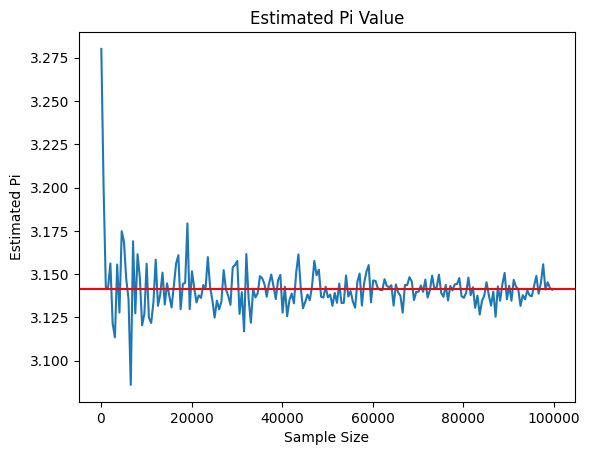

In [11]:
# Now evaluate the above simulation for a range of sample sizes
sample_sizes = np.arange(100, 100000, 500)
estimated_pis = []
for size in sample_sizes:
    raindrops = [raindrop() for i in range(size)]
    inside_circle = [is_inside_circle(x, y) for x, y in raindrops]
    fraction_inside_circle = sum(inside_circle) / size
    estimated_pis.append(4 * fraction_inside_circle)

# Plot the estimated pi value as a function of sample size
plt.plot(sample_sizes, estimated_pis)
# The true value of pi
plt.axhline(y=np.pi, color='r', linestyle='-')
plt.xlabel('Sample Size')
plt.ylabel('Estimated Pi')
plt.title('Estimated Pi Value')
plt.show()


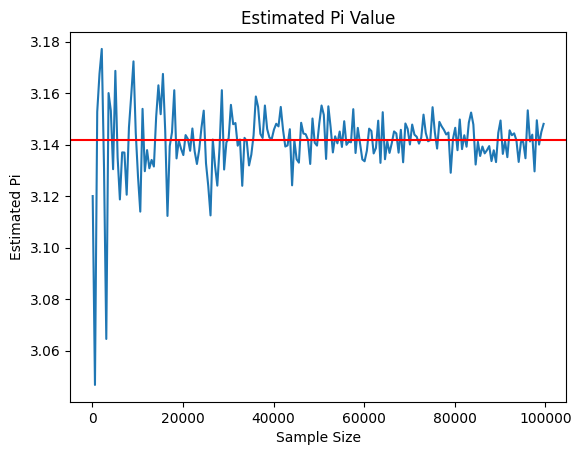

In [12]:
# Is the above curve equal every-time you run the simulation?
# Set the random seed
np.random.seed(0)

# Now evaluate the above simulation for a range of sample sizes
sample_sizes = np.arange(100, 100000, 500)
estimated_pis = []
for size in sample_sizes:
    raindrops = [raindrop() for i in range(size)]
    inside_circle = [is_inside_circle(x, y) for x, y in raindrops]
    fraction_inside_circle = sum(inside_circle) / size
    estimated_pis.append(4 * fraction_inside_circle)

# Plot the estimated pi value as a function of sample size
plt.plot(sample_sizes, estimated_pis)
# The true value of pi
plt.axhline(y=np.pi, color='r', linestyle='-')
plt.xlabel('Sample Size')
plt.ylabel('Estimated Pi')
plt.title('Estimated Pi Value')
plt.show()

In [13]:
# Are the curves above converging to the true value of pi?
# Compute the absolute error of the estimated pi value
absolute_errors = np.abs(np.array(estimated_pis) - np.pi)

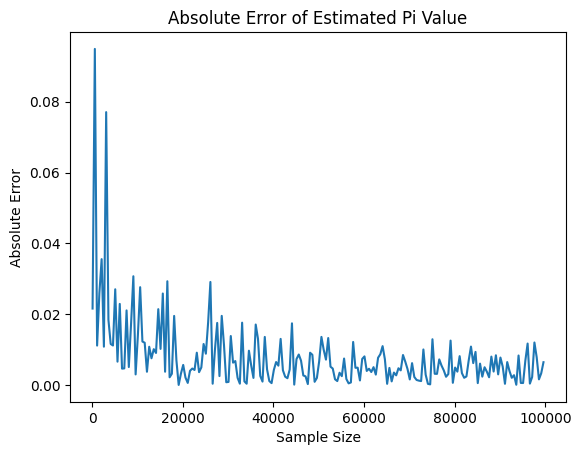

In [14]:
# Is the curve above converging to zero?
plt.plot(sample_sizes, absolute_errors)
plt.xlabel('Sample Size')
plt.ylabel('Absolute Error')
plt.title('Absolute Error of Estimated Pi Value')
plt.show()

# What is your problem of interest?
- Are you trying to compute an integral in practice?
- Can you think of ways of applying MC to solve this problem?